In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 輸入參數

In [9]:
# x, num: the thickness and the number of the film
x = [190, 221, 203, 208, 188, 219, 191, 224, 203, 218, 200, 213, 196, 224, 194, 223, 198, 214, 196, 223, 187, 213, 203, 213, 196, 223, 203, 218, 185, 206]
x1 = np.zeros(10, int)
x2 = np.zeros(10, int)
num = 20
# divide the films into two parts(odd layers, even layers)
for k in range(0, num, 1):
    if int(k%2) == 0:
        x1[int(k/2)] = x[k]
    else:
        x2[int((k-1)/2)] = x[k]
# no, n1, n2 = the refraction index of vacuum, medium1(odd layer), and medium2(even layer)
no = 1
n1 = 1.45
n2 = 2
# e0, u0 = permeability of vacuum 
e0 = 1/(36*np.pi)*(1e-9)
u0 = 4*np.pi*(1e-9)
# Y0, Y1, Y2 = optical admittance of vacuum, medium1(odd layer), and medium2(even layer)
Y0 = np.sqrt(e0/u0)
Y1 = n1*Y0
Y2 = n2*Y0

## 計算多層膜(20層)的反射率及透射率

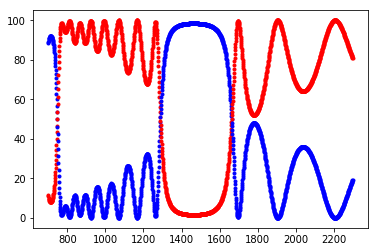

In [10]:
# lambda is from 700nm to 2300nm
for lamb in range(700, 2300, 1):
    BC = np.array([
        [1], 
        [Y0]
    ])    
    for i in range(1, int(num/2), 1):
        d1 = 2*np.pi/lamb*n1*x1[i]
        M1 = np.array([
            [np.cos(d1), 1j*np.sin(d1)/Y1], 
            [1j*Y1*np.sin(d1), np.cos(d1)]
        ])
        d2 = 2*np.pi/lamb*n2*x2[i]
        M2 = np.array([
            [np.cos(d2), 1j*np.sin(d2)/Y2], 
            [1j*Y2*np.sin(d2), np.cos(d2)]
        ])
        BC = M1.dot(M2).dot(BC)
    B = BC[0]
    C = BC[1]
    R = (abs(Y0*B-C)**2)/(abs(Y0*B+C)**2)*100
    T = (4*Y0*np.real(Y0))/(abs(Y0*B+C)**2)*100
    X = lamb
    plt.plot(X, R, 'b.')
    plt.plot(X, T, 'r.')
